In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('/Users/ivy/Desktop/data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [5]:
# The classes are heavily skewed.
print(data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


In [8]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop column
    df = df.drop(' Net Income Flag', axis=1)
    
    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)

Accuracy: 96.43%


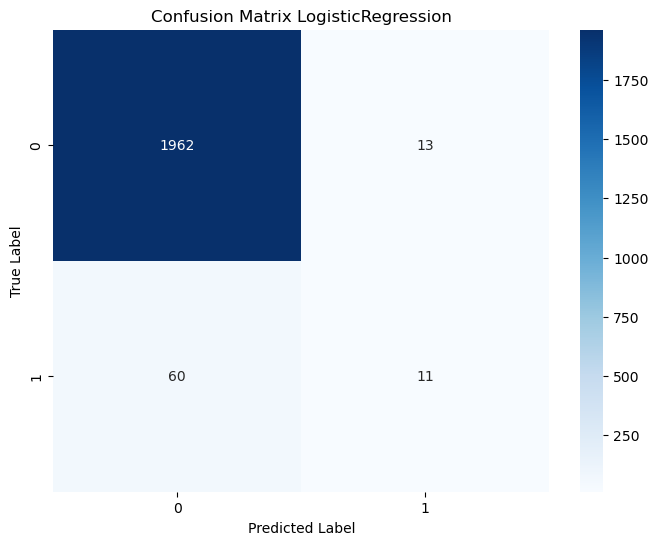

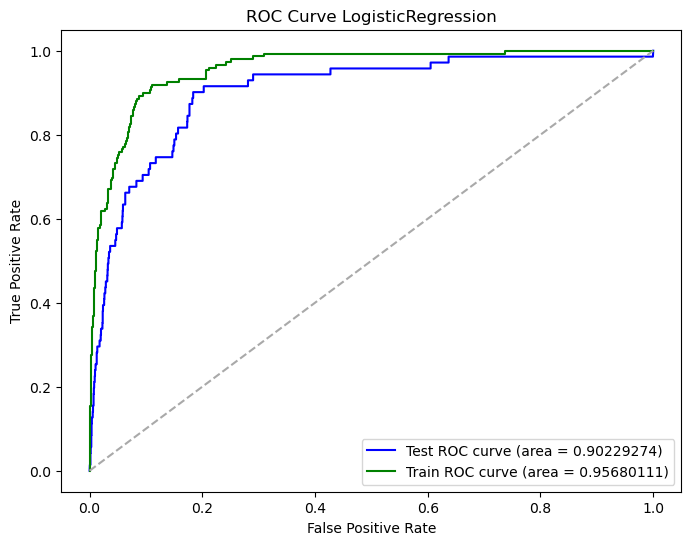

In [24]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Make predictions
predictions = model1.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict probabilities for the test set
test_probabilities = model1.predict_proba(X_test)[:, 1]

# Predict probabilities for the training set
train_probabilities = model1.predict_proba(X_train)[:, 1]

# Calculate ROC Curve for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probabilities)
test_auc = roc_auc_score(y_test, test_probabilities)

# Calculate ROC Curve for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probabilities)
train_auc = roc_auc_score(y_train, train_probabilities)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'Test ROC curve (area = {test_auc:.8f})')
plt.plot(train_fpr, train_tpr, color='green', label=f'Train ROC curve (area = {train_auc:.8f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LogisticRegression')
plt.legend(loc='lower right')
plt.show()

Accuracy: 96.33%


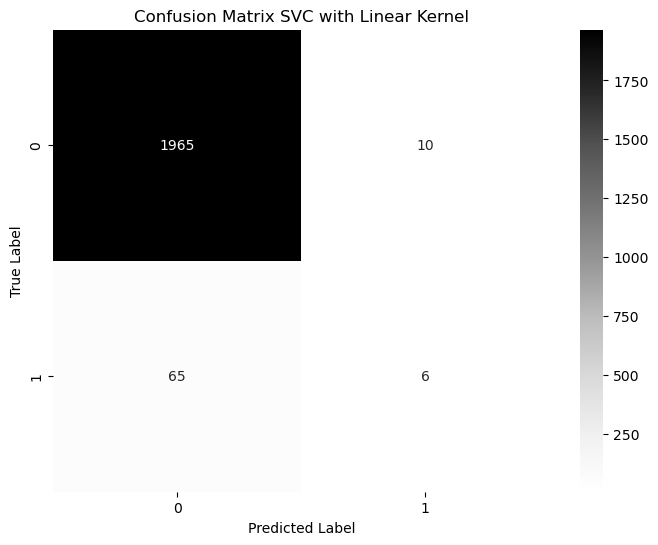

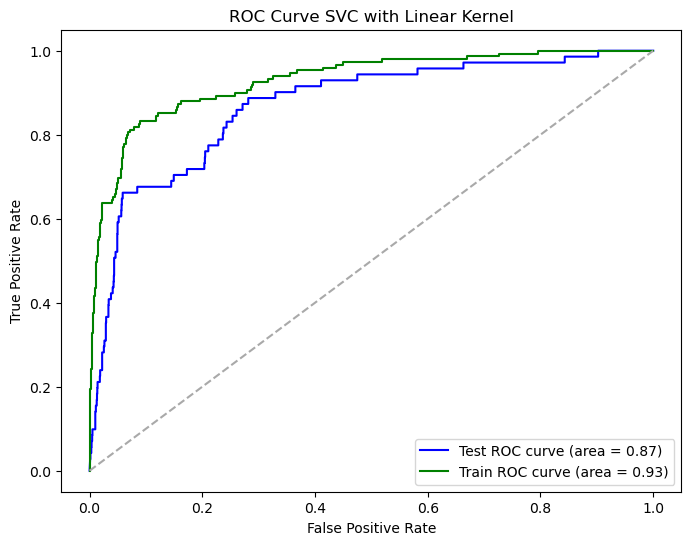

In [26]:
# SVC with linear Kernel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

model2 = SVC(kernel='linear', probability=True)
model2.fit(X_train, y_train)

# Make predictions
predictions = model2.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
#Printing Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix SVC with Linear Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Predict probabilities for the test set
test_probabilities = model2.predict_proba(X_test)[:, 1]

# Predict probabilities for the training set
train_probabilities = model2.predict_proba(X_train)[:, 1]

# Calculate ROC Curve for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probabilities)
test_auc = roc_auc_score(y_test, test_probabilities)

# Calculate ROC Curve for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probabilities)
train_auc = roc_auc_score(y_train, train_probabilities)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'Test ROC curve (area = {test_auc:.2f})')
plt.plot(train_fpr, train_tpr, color='green', label=f'Train ROC curve (area = {train_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC with Linear Kernel')
plt.legend(loc='lower right')
plt.show()

Accuracy: 96.58%


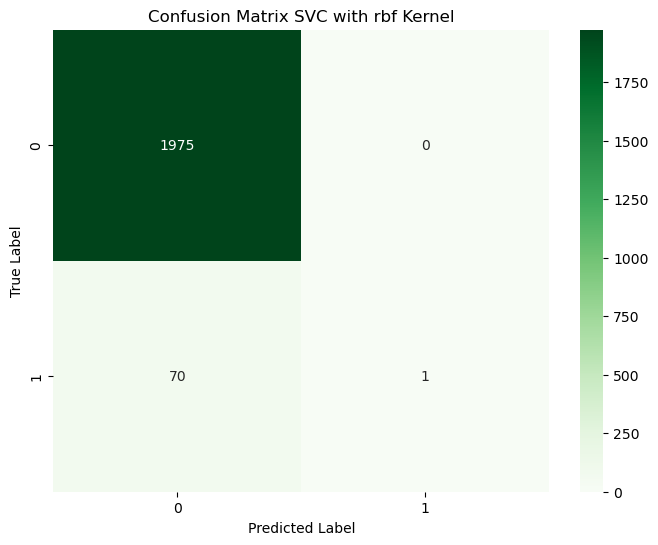

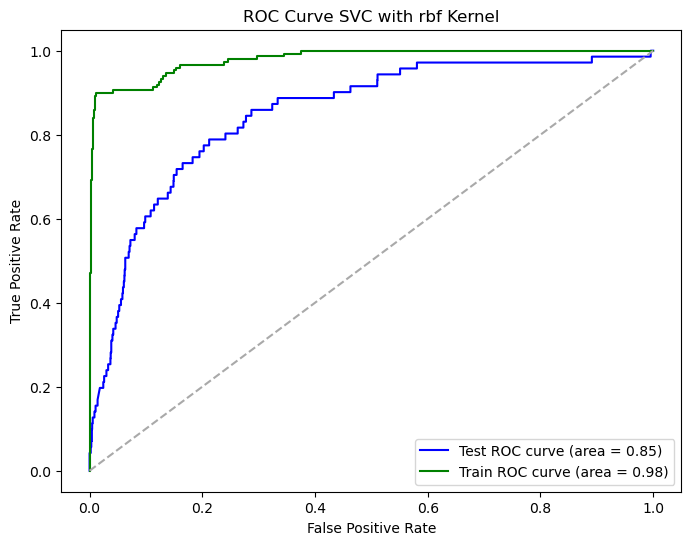

In [23]:
# SVC with rbf Kernel
model3 = SVC(kernel='rbf', probability=True)
model3.fit(X_train, y_train)

# Make predictions
predictions = model3.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

#Printing Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix SVC with rbf Kernel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict probabilities for the test set
test_probabilities = model3.predict_proba(X_test)[:, 1]

# Predict probabilities for the training set
train_probabilities = model3.predict_proba(X_train)[:, 1]

# Calculate ROC Curve for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probabilities)
test_auc = roc_auc_score(y_test, test_probabilities)

# Calculate ROC Curve for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probabilities)
train_auc = roc_auc_score(y_train, train_probabilities)

# Plotting both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', label=f'Test ROC curve (area = {test_auc:.2f})')
plt.plot(train_fpr, train_tpr, color='green', label=f'Train ROC curve (area = {train_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC with rbf Kernel')
plt.legend(loc='lower right')
plt.show()